In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

Importing the dataset

In [2]:
data = pd.read_csv('/content/drive/MyDrive/spotify_songs.csv')
data.head(7)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,124.982,163049
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,5,-4.788,0,0.0623,0.1870,0.000000,0.1760,0.152,112.648,187675


EDA of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [4]:
data.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [5]:
data.duplicated().sum()

0

Checking if the dataset is balanced

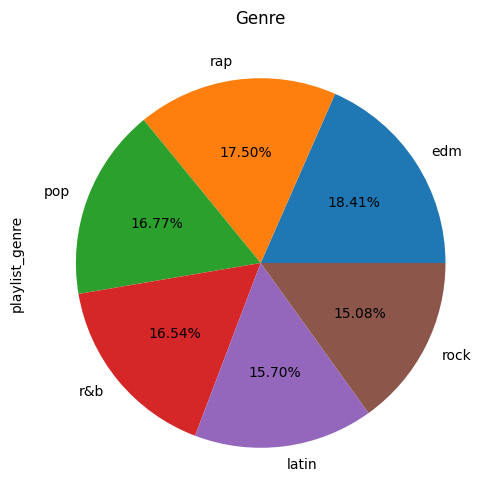

In [6]:
plt.figure(figsize = (6,6))
data['playlist_genre'].value_counts().plot(kind = "pie",autopct = "%.2f%%")
plt.title('Genre',fontsize=12)
plt.show()

Checking the distribution of the Classes

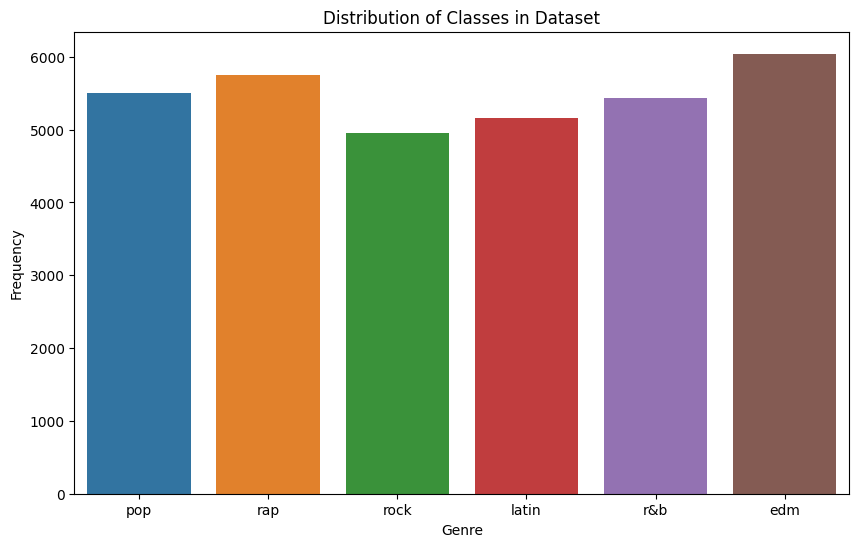

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'playlist_genre' is the column with class labels
plt.figure(figsize=(10, 6))
sns.countplot(x='playlist_genre', data=data)
plt.title('Distribution of Classes in Dataset')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

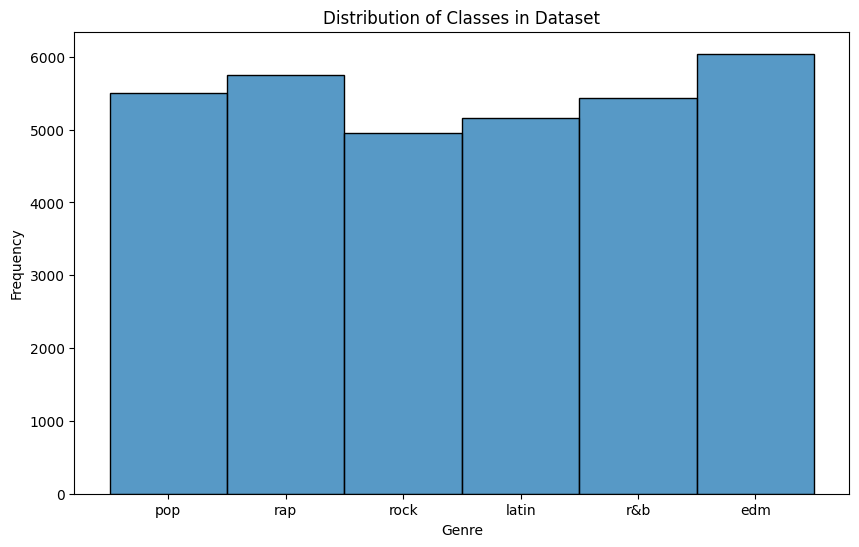

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'playlist_genre' is the column with class labels
plt.figure(figsize=(10, 6))
sns.histplot(data['playlist_genre'], kde=False)
plt.title('Distribution of Classes in Dataset')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()


Checking outliers for the numerical Columns

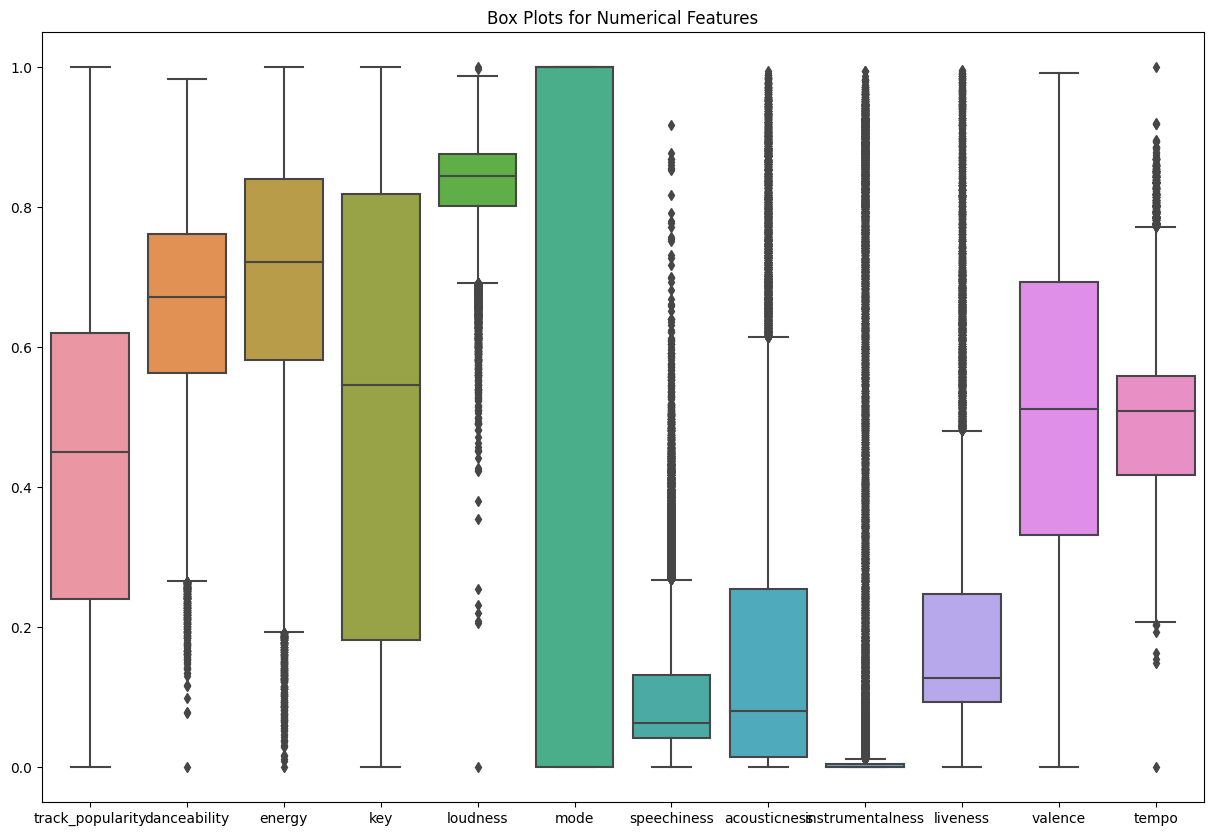

In [65]:
# Box plots for all numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title('Box Plots for Numerical Features')
plt.show()


Removing unnecessary columns

In [7]:
colsToDrop = ['track_id','track_album_id','playlist_id','duration_ms','track_album_release_date']

def uselesscols(data, colsToDrop):
  data = data.drop(colsToDrop, axis=1)
  return data

data = uselesscols(data, colsToDrop)
data.head(7)

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976
5,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,Beautiful People (feat. Khalid) [Jack Wins Remix],Pop Remix,pop,dance pop,0.675,0.919,8,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,124.982
6,Never Really Over - R3HAB Remix,Katy Perry,62,Never Really Over (R3HAB Remix),Pop Remix,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.1870,0.000000,0.1760,0.152,112.648


Scaling the features

In [8]:
scaler = MinMaxScaler()
data[['track_popularity','loudness','key','tempo']] = scaler.fit_transform(data[['track_popularity','loudness','key','tempo']])

In [9]:
data.head(7)

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,pop,dance pop,0.748,0.916,0.545455,0.918090,1,0.0583,0.1020,0.000000,0.0653,0.518,0.509673
1,Memories - Dillon Francis Remix,Maroon 5,0.67,Memories (Dillon Francis Remix),Pop Remix,pop,dance pop,0.726,0.815,1.000000,0.869162,1,0.0373,0.0724,0.004210,0.3570,0.693,0.417524
2,All the Time - Don Diablo Remix,Zara Larsson,0.70,All the Time (Don Diablo Remix),Pop Remix,pop,dance pop,0.675,0.931,0.090909,0.901368,0,0.0742,0.0794,0.000023,0.1100,0.613,0.517908
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,0.60,Call You Mine - The Remixes,Pop Remix,pop,dance pop,0.718,0.930,0.636364,0.894118,1,0.1020,0.0287,0.000009,0.2040,0.277,0.509338
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,0.69,Someone You Loved (Future Humans Remix),Pop Remix,pop,dance pop,0.650,0.833,0.090909,0.875385,1,0.0359,0.0803,0.000000,0.0833,0.725,0.517775
5,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,0.67,Beautiful People (feat. Khalid) [Jack Wins Remix],Pop Remix,pop,dance pop,0.675,0.919,0.727273,0.860445,1,0.1270,0.0799,0.000000,0.1430,0.585,0.521976
6,Never Really Over - R3HAB Remix,Katy Perry,0.62,Never Really Over (R3HAB Remix),Pop Remix,pop,dance pop,0.449,0.856,0.454545,0.872954,0,0.0623,0.1870,0.000000,0.1760,0.152,0.470464


Splitting the numerical and string columns into sepreate dataframes, so that PCA can be applied on the numerical columns

In [10]:
dataNumCols = data.drop(['track_name', 'track_artist', 'track_popularity', 'track_album_name','playlist_name', 'playlist_genre', 'playlist_subgenre'],axis=1)

dataStrCols = data.drop(['danceability','energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo'],axis=1)

In [11]:
print(dataStrCols.head())
print('-----------'*7)
print(dataNumCols.head())

                                          track_name      track_artist  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                    Memories - Dillon Francis Remix          Maroon 5   
2                    All the Time - Don Diablo Remix      Zara Larsson   
3                  Call You Mine - Keanu Silva Remix  The Chainsmokers   
4            Someone You Loved - Future Humans Remix     Lewis Capaldi   

   track_popularity                                   track_album_name  \
0              0.66  I Don't Care (with Justin Bieber) [Loud Luxury...   
1              0.67                    Memories (Dillon Francis Remix)   
2              0.70                    All the Time (Don Diablo Remix)   
3              0.60                        Call You Mine - The Remixes   
4              0.69            Someone You Loved (Future Humans Remix)   

  playlist_name playlist_genre playlist_subgenre  
0     Pop Remix            pop         dance pop  
1     Po

Making sure all the numerical columns are scaled properly

In [12]:
for i in dataNumCols:
  print(f'{i}: {dataNumCols[i].min()} - {dataNumCols[i].max()}')

danceability: 0.0 - 0.983
energy: 0.000175 - 1.0
key: 0.0 - 1.0
loudness: 0.0 - 1.0
mode: 0 - 1
speechiness: 0.0 - 0.918
acousticness: 0.0 - 0.994
instrumentalness: 0.0 - 0.994
liveness: 0.0 - 0.996
valence: 0.0 - 0.991
tempo: 0.0 - 1.0


Implementing the Principal Component Analysis (PCA). PCA is a statistical technique that simplifies the complexity in high-dimensional data by transforming it into fewer dimensions, which retain most of the variation in the data.

In [13]:
# Putting all the numerical data in an array with the shape of (32833, 11) (Rows, Columns)
allNumData = dataNumCols.loc[:, dataNumCols.columns].values

pca = PCA(n_components = 6)
pcaData = pca.fit_transform(allNumData)

# Let's check ow much data is retained after PCA, we can adjust the n_components through trial and error
print(pca.explained_variance_ratio_.sum())

# Make new dataframe from pca.fit_transformed data
pcaDataf = pd.DataFrame(data = pcaData, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6'])

pcaDataf

0.9067382436742324


,pca1,pca2,pca3,pca4,pca5,pca6
0,-0.413212,-0.141448,-0.188036,0.035742,-0.045747,-0.101068
1,-0.325039,-0.592522,-0.248363,-0.049747,0.011165,0.102994
2,0.478647,0.494724,-0.260000,-0.002224,-0.015718,-0.016674
3,-0.395223,-0.222263,-0.114481,0.234618,-0.196254,-0.041156
4,-0.503380,0.298162,-0.265029,-0.091216,0.041898,-0.048495
...,...,...,...,...,...,...
32828,-0.489365,0.226037,-0.018635,0.285431,-0.275318,-0.017494
32829,-0.522874,0.399155,-0.126642,0.177263,-0.181096,0.142042
32830,0.562872,0.056094,-0.068277,0.096489,-0.146418,0.024493
32831,-0.484176,0.222956,-0.103243,0.301622,-0.105187,0.098558


Merging string columns dataframe and the PCA dataframe

In [14]:
dataStrCols[['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6']] = pcaDataf[['pca1','pca2','pca3','pca4','pca5','pca6']]

combinedData = dataStrCols

In [15]:
combinedData.head(7)

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,pop,dance pop,-0.413212,-0.141448,-0.188036,0.035742,-0.045747,-0.101068
1,Memories - Dillon Francis Remix,Maroon 5,0.67,Memories (Dillon Francis Remix),Pop Remix,pop,dance pop,-0.325039,-0.592522,-0.248363,-0.049747,0.011165,0.102994
2,All the Time - Don Diablo Remix,Zara Larsson,0.70,All the Time (Don Diablo Remix),Pop Remix,pop,dance pop,0.478647,0.494724,-0.260000,-0.002224,-0.015718,-0.016674
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,0.60,Call You Mine - The Remixes,Pop Remix,pop,dance pop,-0.395223,-0.222263,-0.114481,0.234618,-0.196254,-0.041156
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,0.69,Someone You Loved (Future Humans Remix),Pop Remix,pop,dance pop,-0.503380,0.298162,-0.265029,-0.091216,0.041898,-0.048495
5,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,0.67,Beautiful People (feat. Khalid) [Jack Wins Remix],Pop Remix,pop,dance pop,-0.378272,-0.321942,-0.227809,0.026046,-0.040051,-0.013524
6,Never Really Over - R3HAB Remix,Katy Perry,0.62,Never Really Over (R3HAB Remix),Pop Remix,pop,dance pop,0.543653,0.153920,0.121564,0.246766,-0.296404,0.070530


In [16]:
combinedData.playlist_genre.value_counts()
combinedData = combinedData.sample(frac=1)

combinedData

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6
14859,In the Shadows,Bombus,0.35,In the Shadows,Hard Rock,rock,hard rock,-0.437213,-0.037973,-0.014791,0.396392,-0.335096,-0.026709
22377,Reckless,Healy,0.01,Subluxe,urban CONTEMPORARY,r&b,urban contemporary,-0.479952,0.219032,0.369548,-0.321604,-0.019949,-0.049677
1598,Die Young,Kesha,0.73,Warrior (Expanded Edition),"post-teen alternative, indie, pop (large variety)",pop,post-teen pop,0.478917,0.490690,-0.300114,-0.143029,0.069837,-0.016326
5108,Shallow - Radio Edit,Lady Gaga,0.78,A Star Is Born Soundtrack (Without Dialogue),indie poptimism,pop,indie poptimism,-0.402485,-0.219486,0.456851,-0.127057,-0.164138,-0.112562
4162,Modern Jesus,Portugal. The Man,0.60,Evil Friends,Indie/Jazz Poptimism,pop,indie poptimism,0.635233,-0.310904,-0.128116,-0.185479,0.040612,0.016049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30116,I Will Never Let You Down - R3hab Remix,Rita Ora,0.32,I Will Never Let You Down (Remixes),EDM - pop remixes,edm,pop edm,-0.448917,0.043056,-0.096256,0.106893,-0.127668,-0.186273
27344,St Louis Blues,The Swing Bot,0.43,St Louis Blues,Electro Swing Top 100,edm,electro house,0.553089,0.138864,0.036305,0.041434,0.354814,-0.067275
11542,Voices Carry,'Til Tuesday,0.05,Voices Carry,80s Pop & Rock Hits and Album Tracks,rock,album rock,-0.523185,0.393307,-0.029491,-0.132422,-0.018828,-0.084960
17404,Say It - Illenium Remix,Flume,0.62,Skin: The Remixes,EDM TROPICAL,latin,tropical,-0.418859,-0.136002,-0.080714,0.139442,-0.164021,-0.041523


Encoding the categorical data

In [17]:
class Encoding():

  def labelEncoding(self, combinedData):
    print('labelEncoding')
    labelEncoder = LabelEncoder()
    combinedData['TargetEncoded'] = labelEncoder.fit_transform(combinedData['playlist_genre'])
    return combinedData


  def oneHotEncoding(self, combinedData):
    print('oneHotEncoding')
    oneHotEncode = OneHotEncoder(sparse=False,drop='first') #drop first col after one hot encoding to avoid multi-collinearity
    oneHotEncodeData = oneHotEncode.fit_transform(combinedData[['playlist_genre']])
    oneHotCols = oneHotEncode.get_feature_names_out()

    oneHotEncodedDf = pd.DataFrame(oneHotEncodeData, columns=oneHotCols)
    return oneHotEncodedDf

encoderObj = Encoding()
encoderObj1 = Encoding()

encoderDf = encoderObj.labelEncoding(combinedData)
encoderDfOneHot = encoderObj1.oneHotEncoding(combinedData)

labelEncoding
oneHotEncoding


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Splitting the data

In [18]:
encoderDf.isnull().sum()

track_name           5
track_artist         5
track_popularity     0
track_album_name     5
playlist_name        0
playlist_genre       0
playlist_subgenre    0
pca_1                0
pca_2                0
pca_3                0
pca_4                0
pca_5                0
pca_6                0
TargetEncoded        0
dtype: int64

In [19]:
X = combinedData.drop('playlist_genre',axis=1)
X = X.drop(['track_name','track_artist','track_album_name','playlist_name','playlist_subgenre'],axis=1)
y = encoderDf['TargetEncoded']

X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

Implementing the random forest classifier and finding the best hyperparameters using grid search with cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid = {
    'n_estimators' : [100, 120, 140, 160, 180],
    'max_features' : ['sqrt'],
    'max_depth' : [18, 20, 22, 24],
    'criterion' : ['entropy'],
    'random_state' : [0]
}

gs = GridSearchCV(estimator= RandomForestClassifier(), param_grid=grid, scoring='accuracy', cv=10, n_jobs=-1)
gs.fit(X_train, y_train)

best_accuracy = gs.best_score_

best_parameters = gs.best_params_

print("Best Accuracy", best_accuracy)
print("Best Parameters", best_parameters)

Best Accuracy 1.0
Best Parameters {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}


Fitting the model using the best hyperparameters

In [20]:
from sklearn.ensemble import RandomForestClassifier
randForestModel = RandomForestClassifier(criterion='entropy', max_depth = 8, max_features='sqrt', n_estimators= 100, random_state=0)
randForestModel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, random_state=0)

Evaluating the random forest model

Accuracy :  0.9970763795833841
Recall:  0.9967551212797052
Precision:  0.9972492316320558
F1 Score:  0.9969768934267104
----------------------------------------
----------------------------------------
----------------------------------------


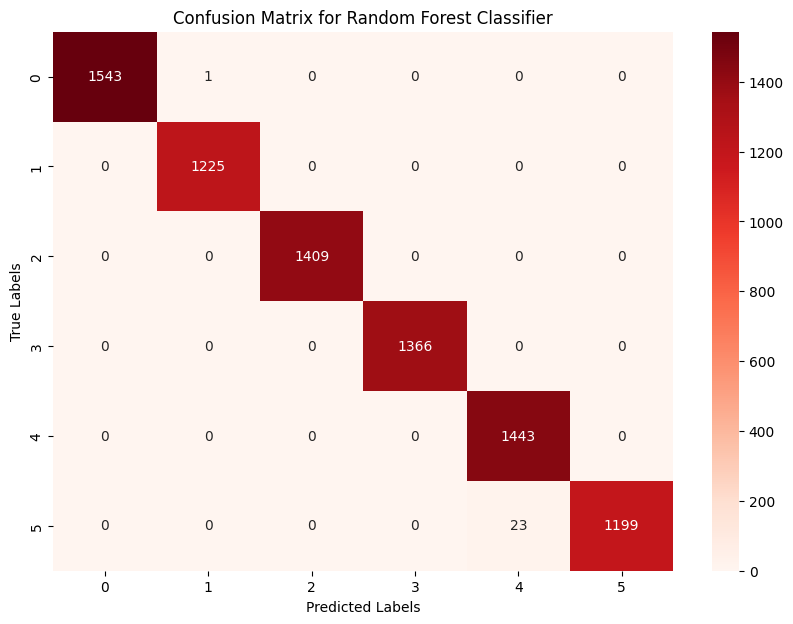

In [21]:
from sklearn.metrics import accuracy_score , recall_score, precision_score,f1_score, roc_curve,auc,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the X_test
y_pred=randForestModel.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)
print("----------------------------------------")
print("----------------------------------------")
print("----------------------------------------")

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

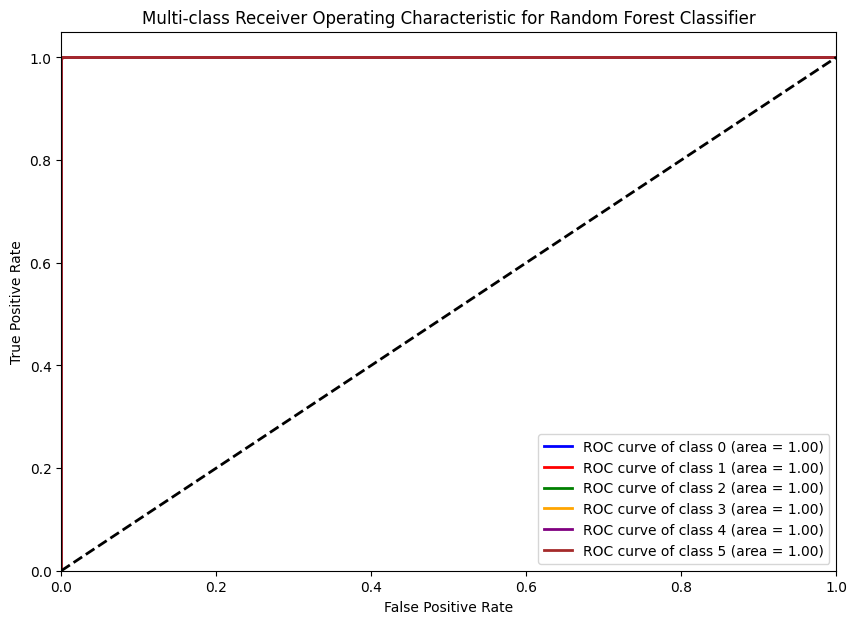

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
y_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], randForestModel.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting all ROC curves
plt.figure(figsize=(10, 7))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()


Implementing the ANN classifier

In [22]:
import tensorflow as tf

Using one hot encoding

In [23]:
data

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,pop,dance pop,0.748,0.916,0.545455,0.918090,1,0.0583,0.102000,0.000000,0.0653,0.5180,0.509673
1,Memories - Dillon Francis Remix,Maroon 5,0.67,Memories (Dillon Francis Remix),Pop Remix,pop,dance pop,0.726,0.815,1.000000,0.869162,1,0.0373,0.072400,0.004210,0.3570,0.6930,0.417524
2,All the Time - Don Diablo Remix,Zara Larsson,0.70,All the Time (Don Diablo Remix),Pop Remix,pop,dance pop,0.675,0.931,0.090909,0.901368,0,0.0742,0.079400,0.000023,0.1100,0.6130,0.517908
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,0.60,Call You Mine - The Remixes,Pop Remix,pop,dance pop,0.718,0.930,0.636364,0.894118,1,0.1020,0.028700,0.000009,0.2040,0.2770,0.509338
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,0.69,Someone You Loved (Future Humans Remix),Pop Remix,pop,dance pop,0.650,0.833,0.090909,0.875385,1,0.0359,0.080300,0.000000,0.0833,0.7250,0.517775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,0.42,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,edm,progressive electro house,0.428,0.922,0.181818,0.935272,1,0.0936,0.076600,0.000000,0.0668,0.2100,0.535291
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,0.20,Closer Remixed,♥ EDM LOVE 2020,edm,progressive electro house,0.522,0.786,0.000000,0.879785,1,0.0420,0.001710,0.004270,0.3750,0.4000,0.534752
32830,Sweet Surrender - Radio Edit,Starkillers,0.14,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,edm,progressive electro house,0.529,0.821,0.545455,0.870628,0,0.0481,0.108000,0.000001,0.1500,0.4360,0.534535
32831,Only For You - Maor Levi Remix,Mat Zo,0.15,Only For You (Remixes),♥ EDM LOVE 2020,edm,progressive electro house,0.626,0.888,0.181818,0.902856,1,0.1090,0.007920,0.127000,0.3430,0.3080,0.534614


In [24]:
X1 = data.drop('playlist_genre',axis=1)
X1 = X1.drop(['track_name','track_artist','track_album_name','playlist_name','playlist_subgenre'],axis=1)
y_1 = encoderDfOneHot

X1_train , X1_test, y_train1 , y_test1 = train_test_split(X,y_1,test_size=0.25,random_state=0)

Creating the ANN

In [ ]:
ann_model=tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=100,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)))
ann_model.add(tf.keras.layers.Dropout(0.4))
ann_model.add(tf.keras.layers.Dense(units=50,activation="relu"))
ann_model.add(tf.keras.layers.Dense(units=5,activation="softmax"))

Compiling the model

In [ ]:
ann_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),loss="categorical_crossentropy",metrics=["accuracy"], run_eagerly=True)

Fitting the model to the training set

In [ ]:
print(X1_train.shape)
print(y_train1.shape)

(24624, 12)
(24624, 5)


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode='max', verbose=1, patience=40)
history=ann_model.fit(X1_train,y_train1,batch_size=64,epochs=100,validation_split=0.3,callbacks=[es])

Epoch 1/100
270/270 [==============================] - 15s 53ms/step - loss: 1.5050 - accuracy: 0.2686 - val_loss: 1.4536 - val_accuracy: 0.2224
Epoch 2/100
270/270 [==============================] - 13s 49ms/step - loss: 1.4666 - accuracy: 0.2708 - val_loss: 1.4227 - val_accuracy: 0.2828
Epoch 3/100
270/270 [==============================] - 13s 49ms/step - loss: 1.4394 - accuracy: 0.2700 - val_loss: 1.4000 - val_accuracy: 0.2515
Epoch 4/100
270/270 [==============================] - 12s 44ms/step - loss: 1.4220 - accuracy: 0.2605 - val_loss: 1.3822 - val_accuracy: 0.2562
Epoch 5/100
270/270 [==============================] - 13s 50ms/step - loss: 1.4040 - accuracy: 0.2704 - val_loss: 1.3672 - val_accuracy: 0.2707
Epoch 6/100
270/270 [==============================] - 14s 51ms/step - loss: 1.3863 - accuracy: 0.2757 - val_loss: 1.3543 - val_accuracy: 0.2899
Epoch 7/100
270/270 [==============================] - 14s 53ms/step - loss: 1.3767 - accuracy: 0.2837 - val_loss: 1.3429 - val_ac

In [ ]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               900       
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 5)                 255       
                                                                 
Total params: 6205 (24.24 KB)
Trainable params: 6205 (24.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


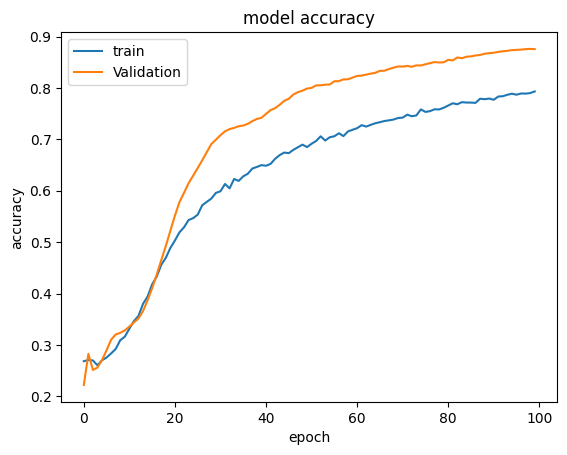

In [ ]:
#Visualizing history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

plt.show()

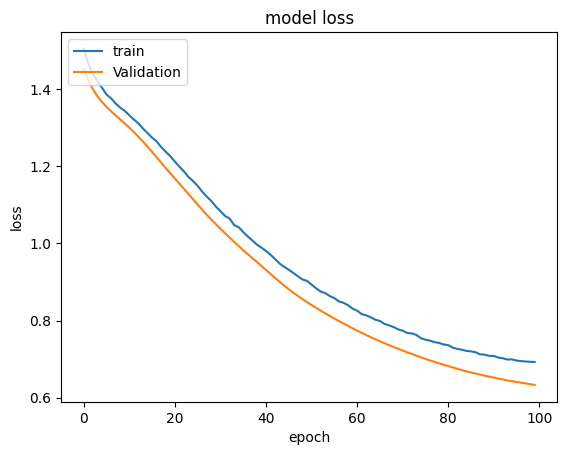

In [ ]:
# Visualizing history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

Evaluating the model

In [ ]:
ann_model.evaluate(X_test,y_test1)

257/257 [==============================] - 7s 27ms/step - loss: 0.6351 - accuracy: 0.8823


[0.6350642442703247, 0.8823242783546448]

Performing hyperparameter tuning to attempt to increase the accuracy of the ANN

In [ ]:
!pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

<ipython-input-40-ad1275e5996c>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [ ]:
def build_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=hp.Choice('units', [64, 128, 256]),
                    activation=hp.Choice('activation', ['relu']),
                    input_shape=(8,)))
    model.add(tf.keras.layers.Dropout(rate=hp.Choice('dropout_rate', [0.2, 0.3, 0.4, 0.5, 0.6])))
    model.add(tf.keras.layers.Dense(units=50, activation=hp.Choice('activation', ['relu'])))
    model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=36,
    executions_per_trial=1,
    directory='my_dir',
    project_name='grid_search'
)

Reloading Tuner from my_dir/grid_search/tuner0.json


In [ ]:
tuner.search(X1_train, y_train1, epochs=100, validation_split=0.2)

Trial 36 Complete [00h 04m 24s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 02h 35m 45s


In [ ]:
best_models = tuner.get_best_models(num_models=1)
best_model = best_models[0]  # Retrieve the best model

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                12850     
                                                                 
 dense_2 (Dense)             (None, 5)                 255       
                                                                 
Total params: 15409 (60.19 KB)
Trainable params: 15409 (60.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hp.values)

{'units': 256, 'activation': 'tanh', 'dropout_rate': 0.6, 'optimizer': 'adam'}


In [25]:
ann_model_best=tf.keras.models.Sequential()
ann_model_best.add(tf.keras.layers.Dense(units=256,activation="tanh",kernel_regularizer=tf.keras.regularizers.L2(0.01)))
ann_model_best.add(tf.keras.layers.Dropout(0.6))
ann_model_best.add(tf.keras.layers.Dense(units=50,activation="tanh"))
ann_model_best.add(tf.keras.layers.Dense(units=5,activation="softmax"))

In [26]:
ann_model_best.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),loss="categorical_crossentropy",metrics=["accuracy"], run_eagerly=True)

In [27]:
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode='max', verbose=1, patience=40)
history=ann_model_best.fit(X1_train,y_train1,batch_size=64,epochs=100,validation_split=0.3,callbacks=[es])

Epoch 1/100
270/270 [==============================] - 14s 52ms/step - loss: 1.5597 - accuracy: 0.2330 - val_loss: 1.4473 - val_accuracy: 0.2725
Epoch 2/100
270/270 [==============================] - 17s 63ms/step - loss: 1.4823 - accuracy: 0.2412 - val_loss: 1.3963 - val_accuracy: 0.2675
Epoch 3/100
270/270 [==============================] - 17s 62ms/step - loss: 1.4543 - accuracy: 0.2561 - val_loss: 1.3717 - val_accuracy: 0.2957
Epoch 4/100
270/270 [==============================] - 15s 57ms/step - loss: 1.4354 - accuracy: 0.2702 - val_loss: 1.3529 - val_accuracy: 0.3212
Epoch 5/100
270/270 [==============================] - 14s 52ms/step - loss: 1.4094 - accuracy: 0.2987 - val_loss: 1.3360 - val_accuracy: 0.3454
Epoch 6/100
270/270 [==============================] - 13s 49ms/step - loss: 1.3949 - accuracy: 0.3160 - val_loss: 1.3197 - val_accuracy: 0.3732
Epoch 7/100
270/270 [==============================] - 15s 55ms/step - loss: 1.3805 - accuracy: 0.3363 - val_loss: 1.3034 - val_ac

Evaluating the new best ANN

In [28]:
ann_model_best.evaluate(X1_test,y_test1)

257/257 [==============================] - 4s 16ms/step - loss: 0.5331 - accuracy: 0.9766


[0.5331253409385681, 0.9766110181808472]

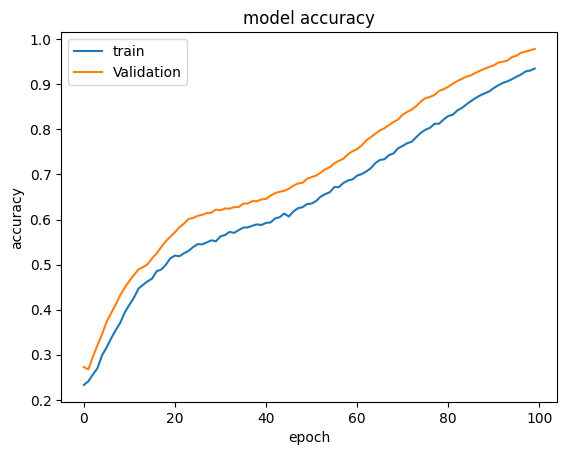

In [29]:
4#Visualizing history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

plt.show()

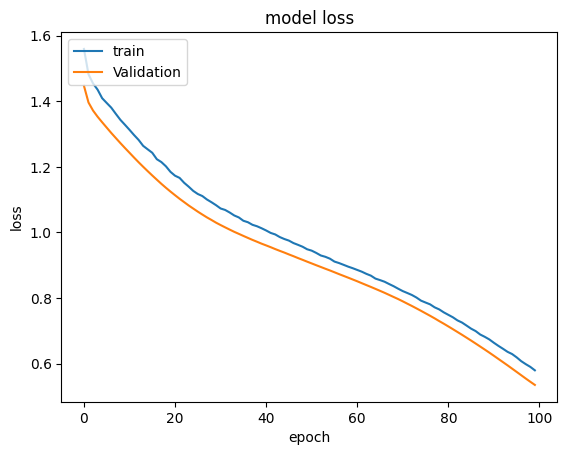

In [30]:
# Visualizing history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

In [37]:
y_pred_ann = ann_model_best.predict(X1_test)

257/257 [==============================] - 5s 19ms/step


In [38]:
print(y_pred_ann)

[[0.00163858 0.00963409 0.02661269 0.26347867 0.6986359 ]
 [0.5332975  0.27926204 0.12522635 0.04287571 0.01933834]
 [0.0051088  0.03019568 0.2087222  0.53500485 0.22096853]
 ...
 [0.00079001 0.00738839 0.0167568  0.18626384 0.78880095]
 [0.46380255 0.3294698  0.13718517 0.04902533 0.02051716]
 [0.02840271 0.08938144 0.5392417  0.28326237 0.05971187]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2769
           1       0.98      0.99      0.98      1409
           2       0.99      1.00      0.99      1366
           3       0.98      0.91      0.95      1443
           4       0.91      0.99      0.94      1222

    accuracy                           0.98      8209
   macro avg       0.97      0.97      0.97      8209
weighted avg       0.98      0.98      0.98      8209

F1 Score: 0.9726215633833108


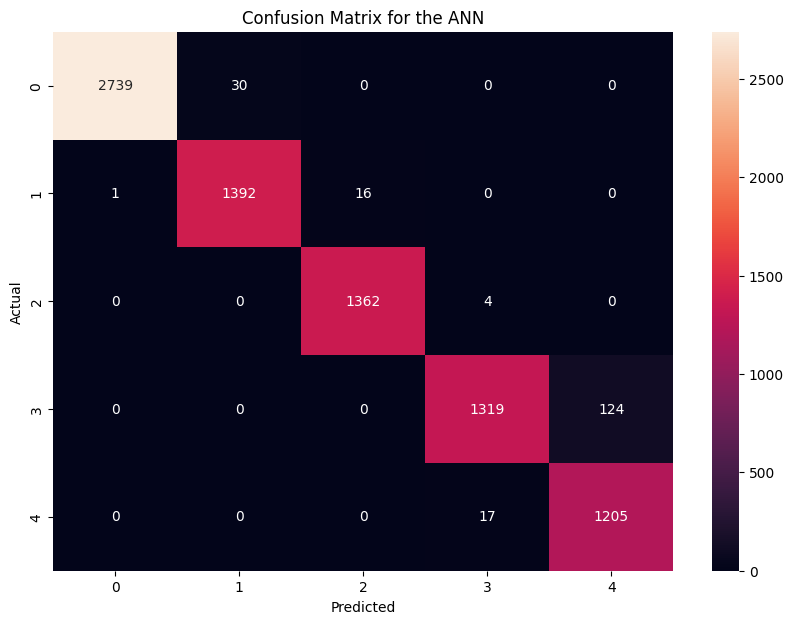

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Convert y_test1 from one-hot encoding to class labels
y_test1_labels = np.argmax(y_test1.values, axis=1)
y_pred_ann_labels = np.argmax(y_pred_ann, axis=1)

# Now y_test1_labels is a 1D array of class labels, similar to y_pred_ann

# Print the classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test1_labels, y_pred_ann_labels))
f1_ann = f1_score(y_test1_labels, y_pred_ann_labels, average='macro')
print(f"F1 Score: {f1_ann}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test1_labels, y_pred_ann_labels)

# Plotting the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix for the ANN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

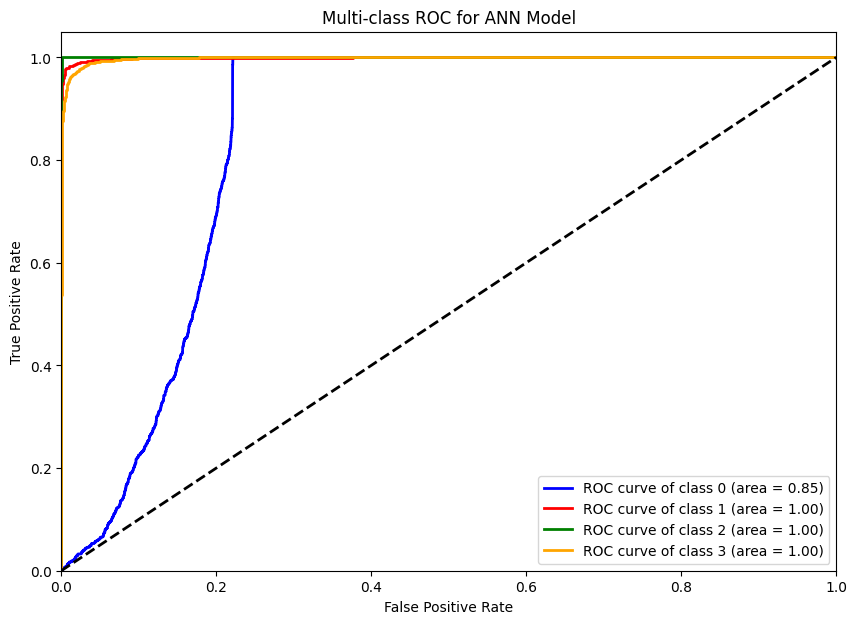

In [58]:
# Convert y_test1 and y_pred_ann to numpy arrays if they are pandas DataFrames or Series
y_test1_np = y_test1.values if isinstance(y_test1, (pd.DataFrame, pd.Series)) else y_test1
y_pred_ann_np = y_pred_ann.values if isinstance(y_pred_ann, (pd.DataFrame, pd.Series)) else y_pred_ann

# Number of classes (adjust this to 4 for your case)
n_classes = 4

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1_np[:, i], y_pred_ann_np[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting all ROC curves
plt.figure(figsize=(10, 7))
colors = ['blue', 'red', 'green', 'orange']  # Added an extra color for the 4th class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for ANN Model')
plt.legend(loc="lower right")
plt.show()

Implementing the SVM

In [46]:
from sklearn.svm  import SVC
classifier= SVC(C=6,gamma=6,kernel="rbf",random_state=0)
classifier.fit(X1_train,y_train)

SVC(C=6, gamma=6, random_state=0)

In [47]:
# Predicting the Test set results
y_pred_svm = classifier.predict(X1_test)

In [48]:
# Print y_pred_svm
print("Predicted Values (y_pred_svm):")
print(y_pred_svm)

# Print the values from the 'TargetEncoded' column in X1_test
print("\nValues in 'TargetEncoded' column of X1_test:")
print(X1_test['TargetEncoded'].values)

Predicted Values (y_pred_svm):
[5 0 4 ... 5 1 3]

Values in 'TargetEncoded' column of X1_test:
[5 0 4 ... 5 1 3]


In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X1_train, y_train, cv=5)

In [50]:
print(f"Accuracy scores for each fold: {scores}")
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation of accuracy: {scores.std()}")

Accuracy scores for each fold: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Standard deviation of accuracy: 0.0


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------


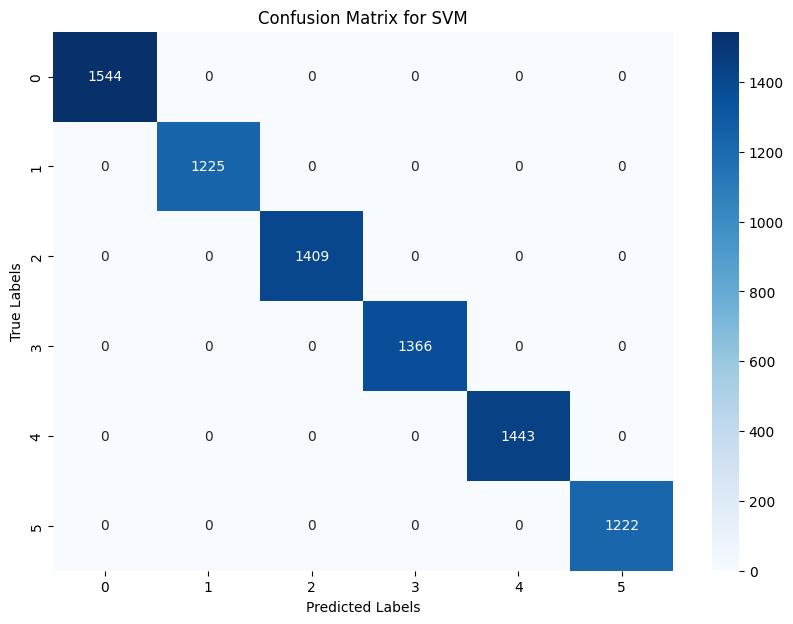

In [51]:
from sklearn.metrics import accuracy_score , recall_score, precision_score,f1_score, roc_curve,auc,confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='macro')
recall = recall_score(y_test, y_pred_svm, average='macro')
f1 = f1_score(y_test, y_pred_svm, average='macro')

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("----------------------------------------")
print("----------------------------------------")
print("----------------------------------------")
print("----------------------------------------")

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

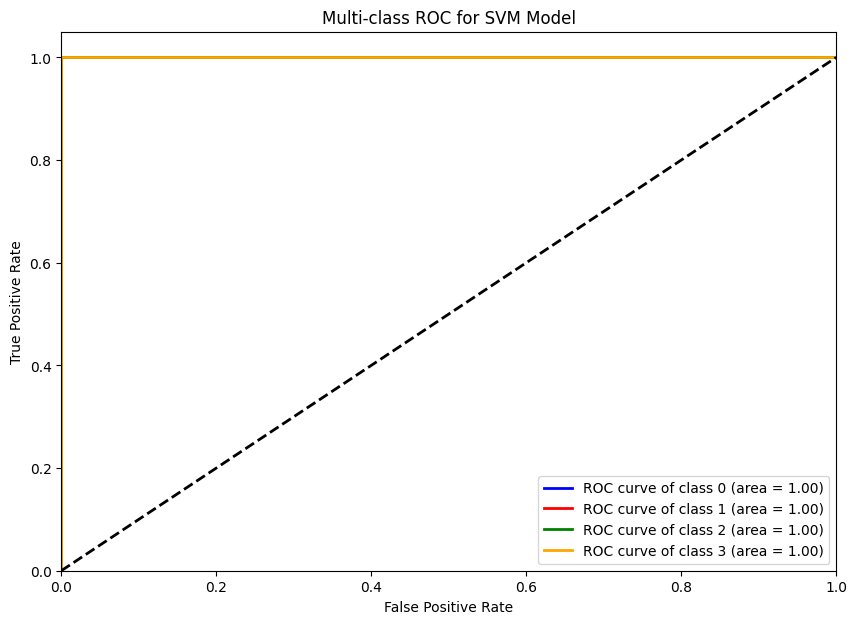

In [59]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

try:
    y_scores_svm = classifier.decision_function(X1_test)
except AttributeError:
    y_scores_svm = classifier.predict_proba(X1_test)

fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()

for i in range(n_classes):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_binarized[:, i], y_scores_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

plt.figure(figsize=(10, 7))
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_svm[i], tpr_svm[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_svm[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for SVM Model')
plt.legend(loc="lower right")
plt.show()


Implementing Logistical Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
print(y_pred_lr)

[5 0 4 ... 5 1 3]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1544
           1       1.00      1.00      1.00      1225
           2       1.00      1.00      1.00      1409
           3       1.00      1.00      1.00      1366
           4       1.00      1.00      1.00      1443
           5       1.00      1.00      1.00      1222

    accuracy                           1.00      8209
   macro avg       1.00      1.00      1.00      8209
weighted avg       1.00      1.00      1.00      8209



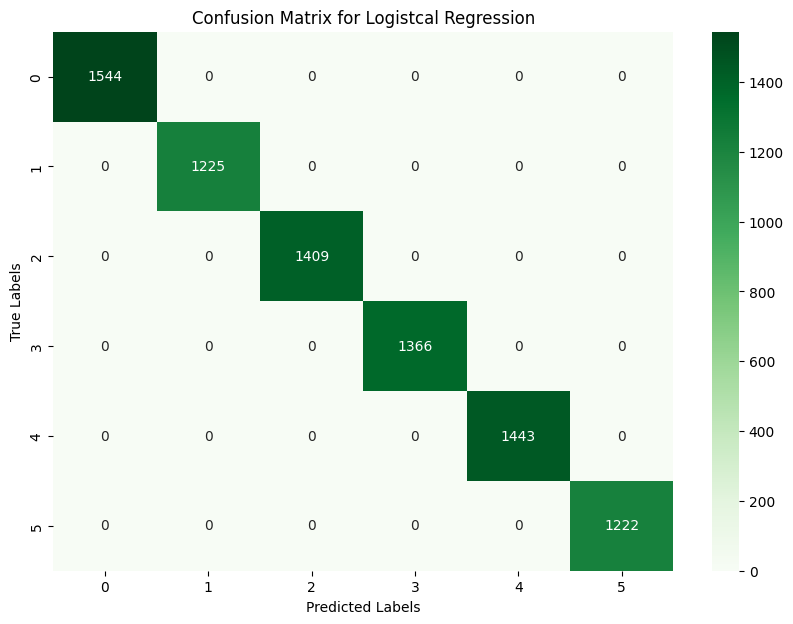

In [55]:
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Logistcal Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

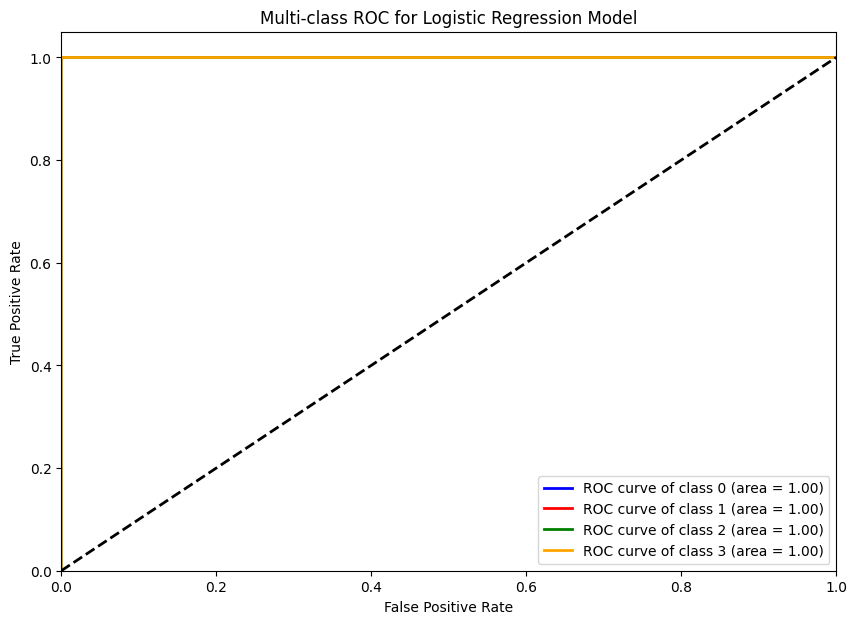

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Get the probability scores for ROC
y_scores_lr = log_reg.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()
for i in range(n_classes):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test_binarized[:, i], y_scores_lr[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

# Plotting all ROC curves
plt.figure(figsize=(10, 7))
colors = ['blue', 'red', 'green', 'orange']  # Colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_lr[i], tpr_lr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_lr[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()
